# KINTU DECLAN TREVOR - 100944330

AIDI 2001 - PROFESSOR UZAIR AHMAD
LAB 4

In [1]:
from math import sqrt
import random
import operator
import matplotlib.pyplot as plt


class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, gene):
        return sqrt(((self.x - gene.x) ** 2) + ((self.y - gene.y) ** 2))

    def __repr__(self):
        return "({0}, {1})".format(str(round(self.x, 2)), str(round(self.y, 2)))


class TSP_GA:
    def __init__(self,
                 routes_count=100,
                 cities_in_route=25,
                 mutation_rate=0.001,
                 elite_percentage=20,
                 random_state=1):
        self.routes_count = routes_count
        self.cities_in_route = cities_in_route
        self.mutation_rate = mutation_rate
        self.elite_percentage = elite_percentage
        random.seed(random_state)
        self.prepareRoutes()
        self.progress = []

    def calcRouteLength(self, route):
        route_length = 0
        # calculate distance between cities in the route
        for i in range(0, len(route) - 1):
            fromCity, toCity = route[i], route[i + 1]
            route_length += fromCity.distance(toCity)
        # calculate distance between last City and first City in the route
        fromCity, toCity = route[len(route) - 1], route[0]
        route_length += fromCity.distance(toCity)
        return route_length

    def prepareRoutes(self, max_x=500, max_y=500):
        city_list = []
        # create a list of cities
        for i in range(0, self.cities_in_route):
            # create a City at random coordinates in a max_x X max_y area
            city_list.append(City(x=int(random.random() * max_x), y=int(random.random() * max_y)))

        self.routes_list = []
        for i in range(0, self.routes_count):
            # randomly permutate cities in the city_list to create a route
            route = random.sample(city_list, len(city_list))
            self.routes_list.append(
                {
                    'route': route,
                    'length': self.calcRouteLength(route)
                }
            )
        print('{0} routes are ready'.format(len(self.routes_list)))

    def rankRoutes(self):
        route_fitness_dict = {}
        for route in self.routes_list:
            route['fitness'] = 1 / float(route['length'])
        return sorted(self.routes_list, key=operator.itemgetter('fitness'), reverse=True)

    def selection(self, ranked_routes):
        selected_routes = []
        # pick top N (eliteSize) best routes to automatically move on to next generation (elitism)
        for i in range(0, int((self.elite_percentage / 100.0) * len(self.routes_list))):
            selected_routes.append(ranked_routes[i])
        # randomly pick as many candidates from the rest as many elite_percentage
        selected_routes.extend(
            random.sample(
                population=ranked_routes[int((self.elite_percentage / 100.0)):],
                k=int((self.elite_percentage / 100.0)))
        )
        return selected_routes

    def orderedCrossOver(self, seleted_routes):
        # shuffle selected routes
        seleted_routes = random.sample(seleted_routes, len(seleted_routes))
        child_routes = []
        while len(child_routes) < self.routes_count:
            # sample two routes from the seletec_routes
            x, y = random.sample(range(len(seleted_routes)), 2)
            parent_route_1 = seleted_routes[x]
            parent_route_2 = seleted_routes[y]
            # select two random points
            p1, p2 = random.sample(range(self.cities_in_route), k=2)
            from_index = min(p1, p2)
            to_index = max(p1, p2)
            # create child route of None values
            child_route = [None] * self.cities_in_route
            # fill the child route with parent_route_1 with values from_index upto to_index
            child_route[from_index:to_index] = parent_route_1['route'][from_index:to_index]
            # fill the child route where values are None with parent_route_2 values if the value is not already present
            i = 0
            while i < self.cities_in_route:
                if ((child_route[i]) is None):
                    for city in parent_route_2['route']:
                        if (city not in child_route):
                            child_route[i] = city
                            break
                i += 1
            # append the new child to child_routes
            child_routes.append({'route': child_route,
                                 'length': self.calcRouteLength(child_route)})
        return child_routes

    def mutate(self, routes):
        mutation_count = 0
        for r in routes:
            route = r['route']
            for i in range(self.cities_in_route):
                if (random.random() < self.mutation_rate):
                    j = int(random.random() * self.cities_in_route)
                    route[j], route[i] = route[i], route[j]
                    mutation_count += 1
        # print("{0} routes mutated ".format(mutation_count))
        return routes

    def nextGeneration(self, current_generation):
        ranked_routes = self.rankRoutes()
        selected_routes = self.selection(ranked_routes)
        # Do we need to apply cross-over only to elite ?
        child_routes = self.orderedCrossOver(selected_routes)

        new_generation = self.mutate(child_routes)
        return new_generation

    def findShortestRoute(self, generations=100):
        ranked_routes = self.rankRoutes()
        bestRoute_1stGen = ranked_routes[0]
        print("Initial distance: " + str(int(ranked_routes[0]['length'])))

        for i in range(0, generations):
            new_generation = self.nextGeneration(current_generation=self.routes_list)
            self.progress.append(self.routes_list[0]['length'])
            self.routes_list = new_generation
            '''if i % 10 == 0:
                self.plotRoute(self.routes_list[0]['route'])'''

        ranked_routes = self.rankRoutes()
        print("Final distance: " + str(int(ranked_routes[0]['length'])))
        bestRoute = self.rankRoutes()[0]['route']
        return bestRoute_1stGen, bestRoute

    '''def plotResults(self):
        plt.plot(self.progress)
        plt.ylabel('Distance')
        plt.xlabel('Generation')
        plt.show()'''
    def plotResults(self, ax):
      ax.plot(self.progress)
      ax.set_ylabel('Distance')
      ax.set_xlabel('Generation')

    # Inside TSP_GA class
    def plotRoute(self, route, ax, title='Route'):
      x_val = [x.x for x in route] + [route[0].x]
      y_val = [x.y for x in route] + [route[0].y]
      ax.plot(x_val, y_val, 'o-')  # Plot on the provided axes object
      ax.set_title(title)





# trials
# mutation rate
# elite percentage
# turn off under-fit solutions (selection method 78-82)


50 routes are ready
Initial distance: 23080
Final distance: 10204
50 routes are ready
Initial distance: 23080
Final distance: 20003
50 routes are ready
Initial distance: 23080
Final distance: 20884
50 routes are ready
Initial distance: 23080
Final distance: 23487
50 routes are ready
Initial distance: 23080
Final distance: 11770
50 routes are ready
Initial distance: 23080
Final distance: 20570
50 routes are ready
Initial distance: 23080
Final distance: 21208
50 routes are ready
Initial distance: 23080
Final distance: 22821
50 routes are ready
Initial distance: 23080
Final distance: 15117
50 routes are ready
Initial distance: 23080
Final distance: 21009
50 routes are ready
Initial distance: 23080
Final distance: 23423
50 routes are ready
Initial distance: 23080
Final distance: 22734
50 routes are ready
Initial distance: 23080
Final distance: 19198
50 routes are ready
Initial distance: 23080
Final distance: 21537
50 routes are ready
Initial distance: 23080
Final distance: 23172
50 routes 

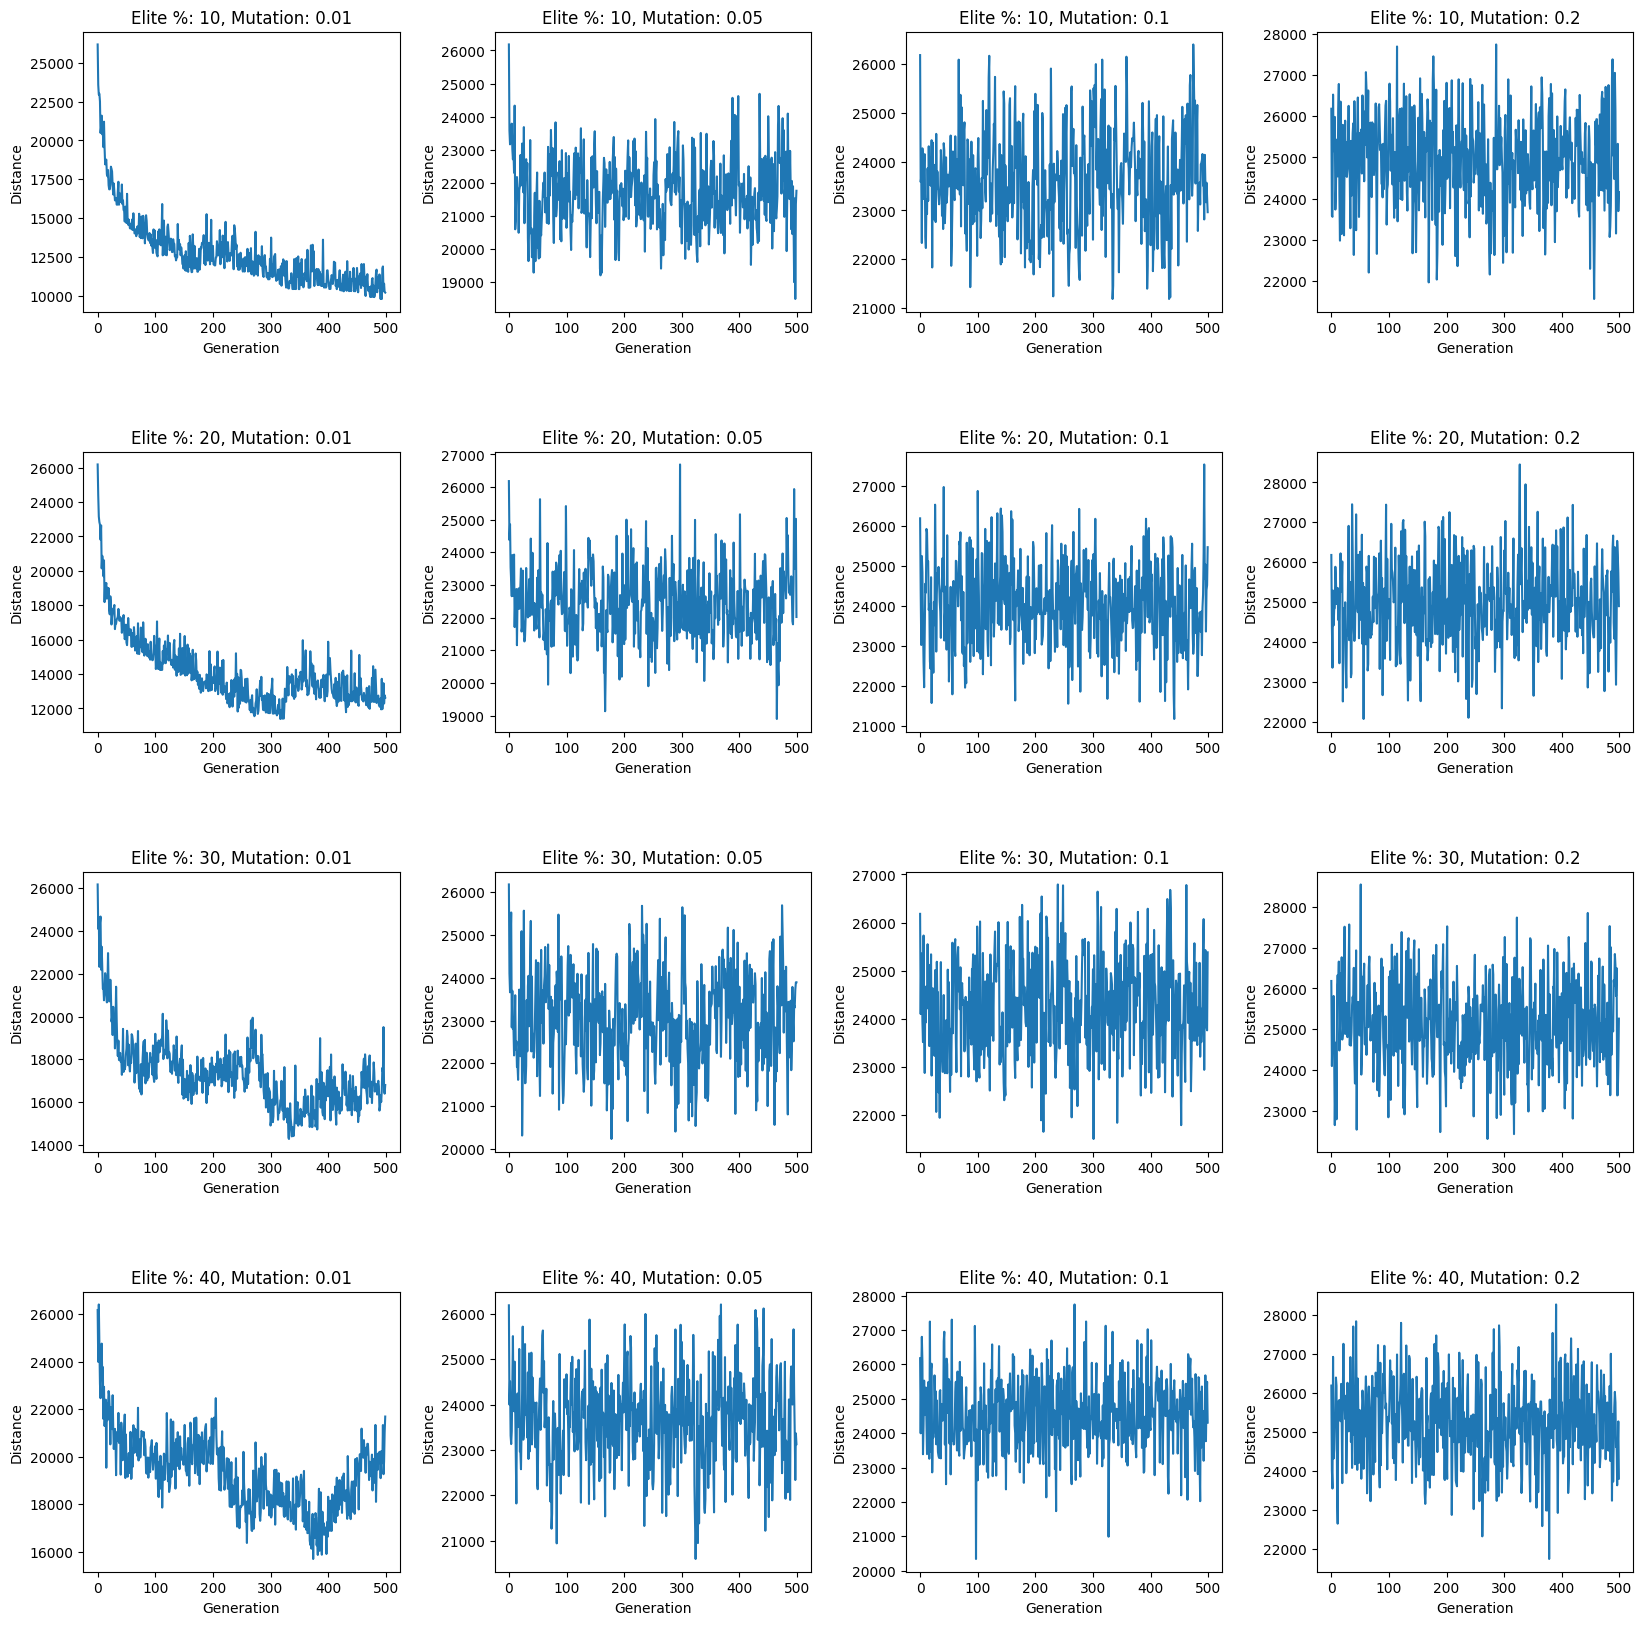

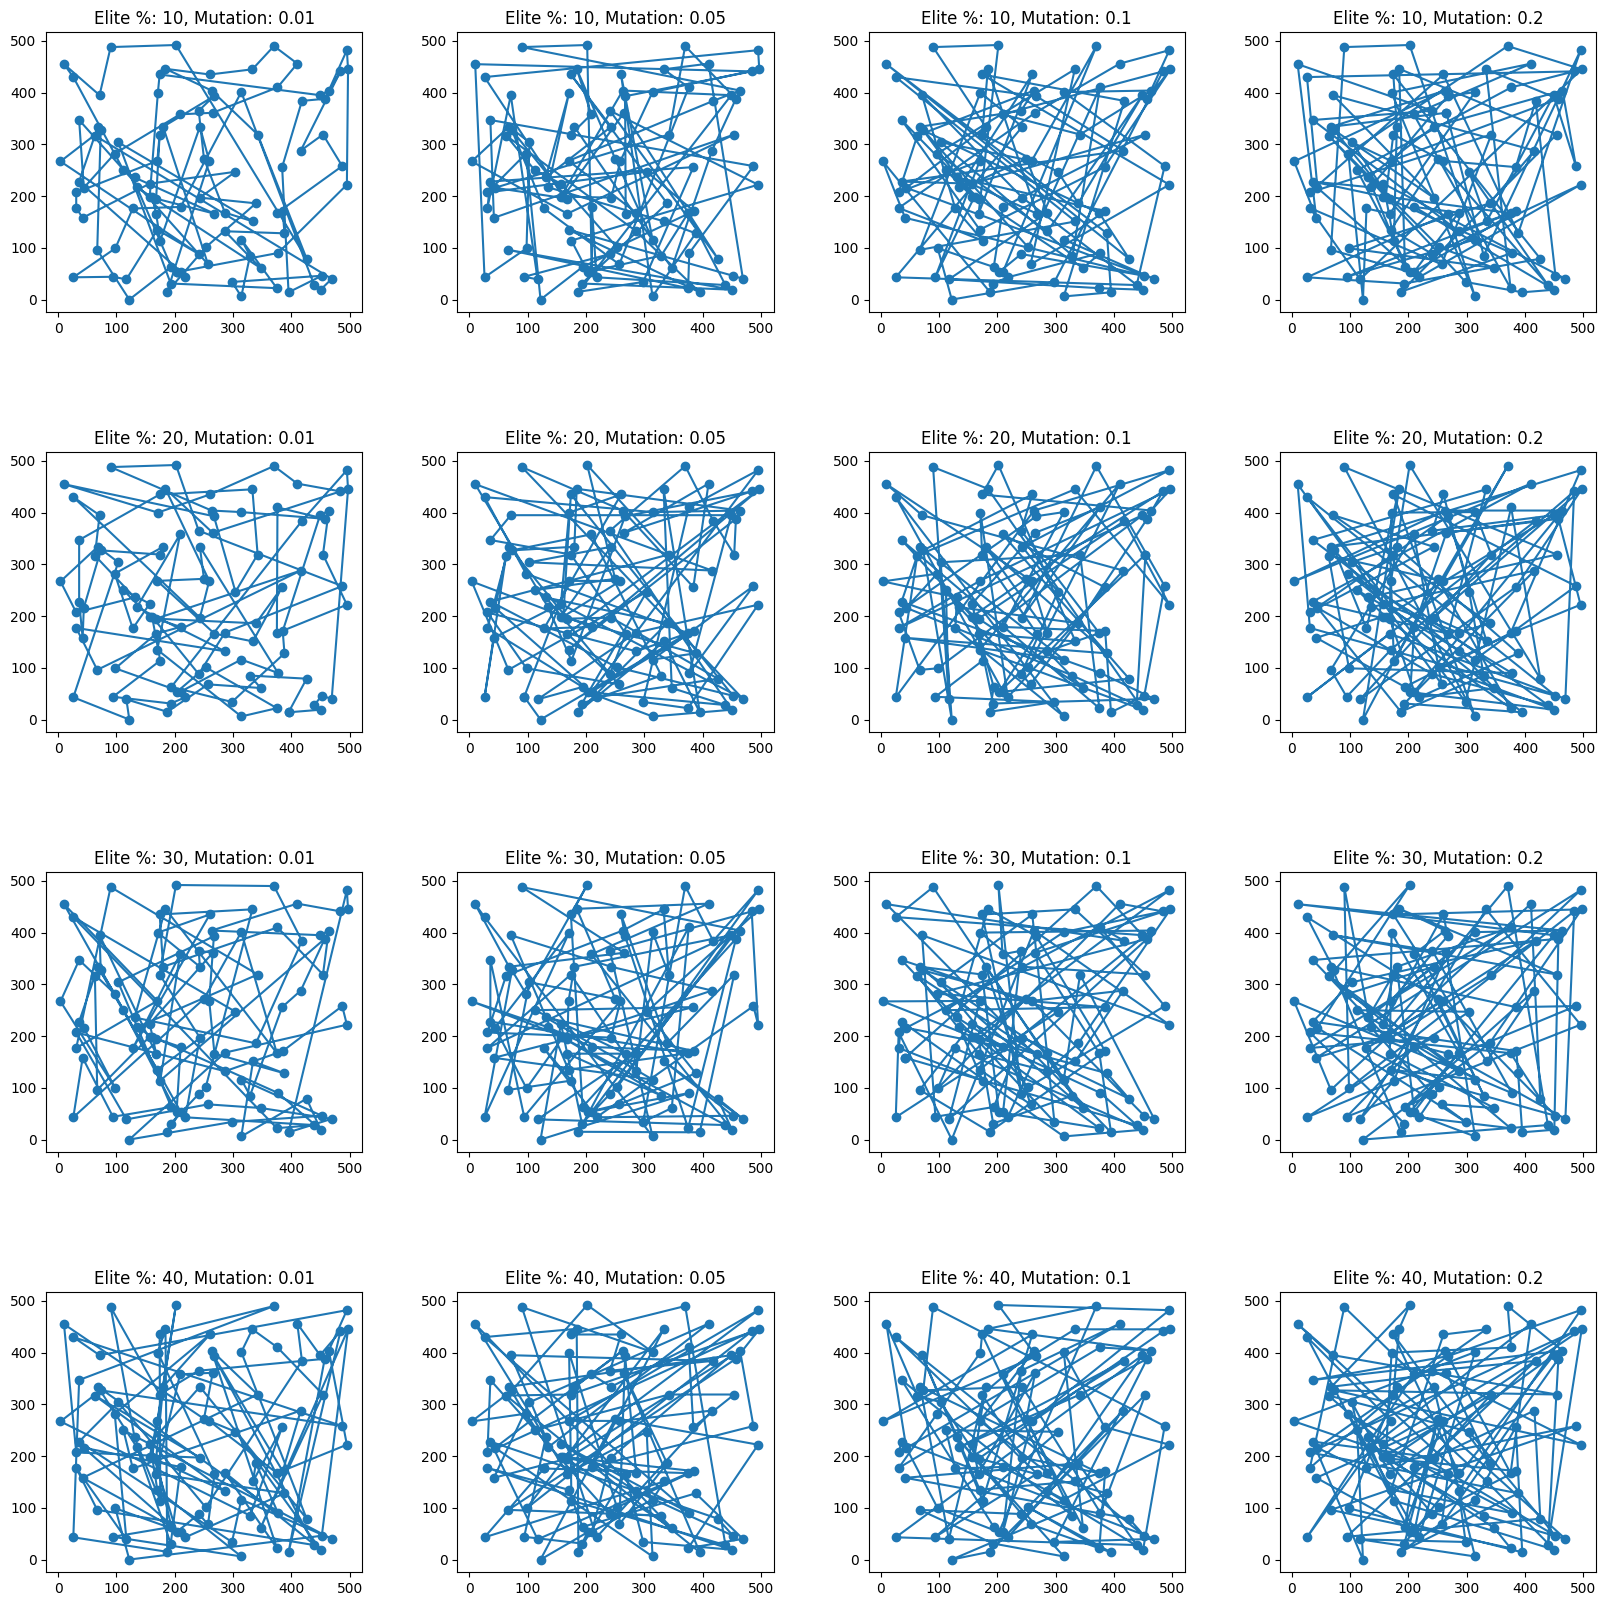

In [2]:
# Define the parameters for the grid search
elite_percentages = [10,20,30,40]
mutation_rates = [0.01,0.05,0.1,0.2]

# Initialize figures for the plots
fig1, axs1 = plt.subplots(4, 4, figsize=(20, 20))  # For plotResults
fig1.subplots_adjust(hspace=0.5, wspace=0.3)
axs1 = axs1.ravel()

fig2, axs2 = plt.subplots(4, 4, figsize=(20, 20))  # For plotRoute
fig2.subplots_adjust(hspace=0.5, wspace=0.3)
axs2 = axs2.ravel()

# Counter for the current subplot index
index = 0

# Nested loops for grid search
for elite_percentage in elite_percentages:
    for mutation_rate in mutation_rates:
        # Initialize TSP_GA with the current parameters
        tsp = TSP_GA(routes_count=50, cities_in_route=100, mutation_rate=mutation_rate, elite_percentage=elite_percentage, random_state=123)

        # Find the best route for the current trial
        bestRoute_1stGen, best_route = tsp.findShortestRoute(generations=500)

        # Plot the results on the corresponding subplot for plotResults
        tsp.plotResults(axs1[index])
        axs1[index].set_title(f'Elite %: {elite_percentage}, Mutation: {mutation_rate}')

        # Plot the route on the corresponding subplot for plotRoute
        # Note that plotRoute needs to be adjusted to accept 'ax' parameter similar to plotResults
        #tsp.plotRoute(best_route, axs2[index], title=f'Elite %: {elite_percentage}, Mutation: {mutation_rate}')
        tsp.plotRoute(best_route, axs2[index], title=f'Elite %: {elite_percentage}, Mutation: {mutation_rate}')

        # Increment the subplot index
        index += 1

# Show the plotResults plots
plt.show(fig1)

# Show the plotRoute plots
plt.show(fig2)
